<a href="https://colab.research.google.com/github/leo-contigo/ML/blob/main/02_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

# 라이브러리 임포트 
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

# gp 설정
%matplotlib inline
plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

#### ML_02_수업자료.html

In [ ]:
# 학습기(모델)
from sklearn.neighbors import KNeighborsClassifier

# 평가도구
from sklearn.metrics import mean_squared_error, accuracy_score

# 유클리드 거리, 맨하탄 거리 함수 임포트 
from scipy.spatial import distance

# kNN(k-Nearest Neighbors, KNeighbors)

- k-최근접 이웃 알고리즘
- scikit-learn 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- 새로운 데이터를 입력받았을때 가장 가까이 있는 것은 무엇일까?

## 두점사이의 거리

### 유클리드 거리(Euclidean Distance)
- 수학 세계에서 모든 차원에서 두 점 사이의 최단 거리
- 두 점 간의 차이 제곱합의 제곱근

### 맨하탄 거리(Manhattan Distance)
- 택시거리, 시가지 거리
- 두 점 간의 차이를 절대값의 합

#### 유클리드 거리

In [ ]:
# 유클리드 거리 구현
# 두 점 간의 차이 제곱합의 제곱근(sqrt)

a = np.array([2, 1, 60, 139, 0])
b = np.array([3, 2, 80, 148, 0])

In [ ]:
np.sqrt((2-3)**2 + (1-2)**2 + (60-80)**2 + (139-148)**2 + (0-0)**2)

21.97726097583591

In [ ]:
# 함수로 구현

def eu_distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [ ]:
eu_distance(a, b)

21.97726097583591

In [ ]:
# scipy 함수 적용

distance.euclidean(a , b)

21.97726097583591

#### 맨하탄 거리

- abs() 절대값

In [ ]:
# scipy 함수 적용 - 맨하탄 

distance.cityblock(a, b)

31

In [ ]:
# 맨하탄 거리 공식으로 거리 구하기

a = np.array([2, 1, 60, 139, 0])
b = np.array([3, 2, 80, 148, 0])

np.abs(2-3) + np.abs(1-2) + np.abs(60-80) + np.abs(139-148) + np.abs(0-0)

31

## 생선 분류 문제

- 출처 : https://www.kaggle.com/aungpyaeap/fish-market
- 도미 데이타 : http://bit.ly/bream_list
- 빙어 데이터 : http://bit.ly/smelt_list
```
1) 데이터 준비 
  도미와 방어의 길이와 무게 
  X, y 
2) 모델 생성 : KNeighborsClassifier
3) 모델 학습 fit()
4) 평가 score()
5) 예측 predict()
```

In [ ]:
# 1) 전체 데이타 준비 

# 도미 데이타 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 데이타 
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 2차원 리스트로 생성

# 도미 + 빙어 길이 → 1차원
length = bream_length + smelt_length

# 도미 + 빙어 무게 → 1차원
weight = bream_weight + smelt_weight


# 2차원 리스트로 생성
# [ [길이1 , 무게1] ..... ]
length[0], weight[0]

(25.4, 242.0)

In [ ]:
#  방법 1

# 1차원인데 인덱스가 같은 요소끼리 2차원으로 리스트 만들기
# temp = []

list(zip(length, weight))   # 리스트 안의 튜플

[(25.4, 242.0),
 (26.3, 290.0),
 (26.5, 340.0),
 (29.0, 363.0),
 (29.0, 430.0),
 (29.7, 450.0),
 (29.7, 500.0),
 (30.0, 390.0),
 (30.0, 450.0),
 (30.7, 500.0),
 (31.0, 475.0),
 (31.0, 500.0),
 (31.5, 500.0),
 (32.0, 340.0),
 (32.0, 600.0),
 (32.0, 600.0),
 (33.0, 700.0),
 (33.0, 700.0),
 (33.5, 610.0),
 (33.5, 650.0),
 (34.0, 575.0),
 (34.0, 685.0),
 (34.5, 620.0),
 (35.0, 680.0),
 (35.0, 700.0),
 (35.0, 725.0),
 (35.0, 720.0),
 (36.0, 714.0),
 (36.0, 850.0),
 (37.0, 1000.0),
 (38.5, 920.0),
 (38.5, 955.0),
 (39.5, 925.0),
 (41.0, 975.0),
 (41.0, 950.0),
 (9.8, 6.7),
 (10.5, 7.5),
 (10.6, 7.0),
 (11.0, 9.7),
 (11.2, 9.8),
 (11.3, 8.7),
 (11.8, 10.0),
 (11.8, 9.9),
 (12.0, 9.8),
 (12.2, 12.2),
 (12.4, 13.4),
 (13.0, 12.2),
 (14.3, 19.7),
 (15.0, 19.9)]

In [ ]:
# 방법 2

# 리스트 for 와 zip()

fish_data = [ [l , w] for l, w in zip(length, weight)]  # 리스트 안의 리스트
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
# 입력 학습 데이터

X = fish_data 

In [ ]:
# 도미의 개수????
len(bream_length), len(smelt_length)

(35, 14)

In [ ]:
# r결과값(답안지) y 데이터 생성
# 도미는 1, 빙어는 0

y = [1] * len(bream_length) + [0] * len(smelt_length)
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
# K-근접 이웃 알고리즘 구현하기 위해 클래스 KNeighborsClassifier()
# 2) 모델(객체) 생성 
model_knn = KNeighborsClassifier()
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# 3) 모델 학습
# X = fish_data / y = fish_target

model_knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
# 4) 평가 후 예측 

model_knn.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
# 일부 데이타 테스트 

model_knn.predict([[29.0, 363.0]])

array([1])

In [ ]:
X[-1], y[-1]

([15.0, 19.9], 0)

In [ ]:
# 개별 테스트
# 모델명.predict_proba(x데이터)

model_knn.predict_proba([[29.0, 363.0]]), model_knn.predict_proba([[15.0, 19.9]])

(array([[0., 1.]]), array([[1., 0.]]))

In [ ]:
# 3) 평가 
# accuracy_score(y_true, y_pred)

accuracy_score(y, model_knn.predict(X))

1.0

In [ ]:
# knn의 k 설정 → 옵션

model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# n_neighbors 가 3 ~ 27 까지 변경될 경우 정확도는?
for n in range(3, 30, 2):
    print(n, end = '')
    model_knn = KNeighborsClassifier(n_neighbors = n)
    model_knn.fit(X, y)
    model_knn.predict(X)
    print(':', model_knn.score(X, y))
    print()

3: 1.0

5: 1.0

7: 1.0

9: 1.0

11: 1.0

13: 1.0

15: 1.0

17: 1.0

19: 0.9795918367346939

21: 0.9795918367346939

23: 0.9795918367346939

25: 0.9795918367346939

27: 0.9795918367346939

29: 0.7142857142857143



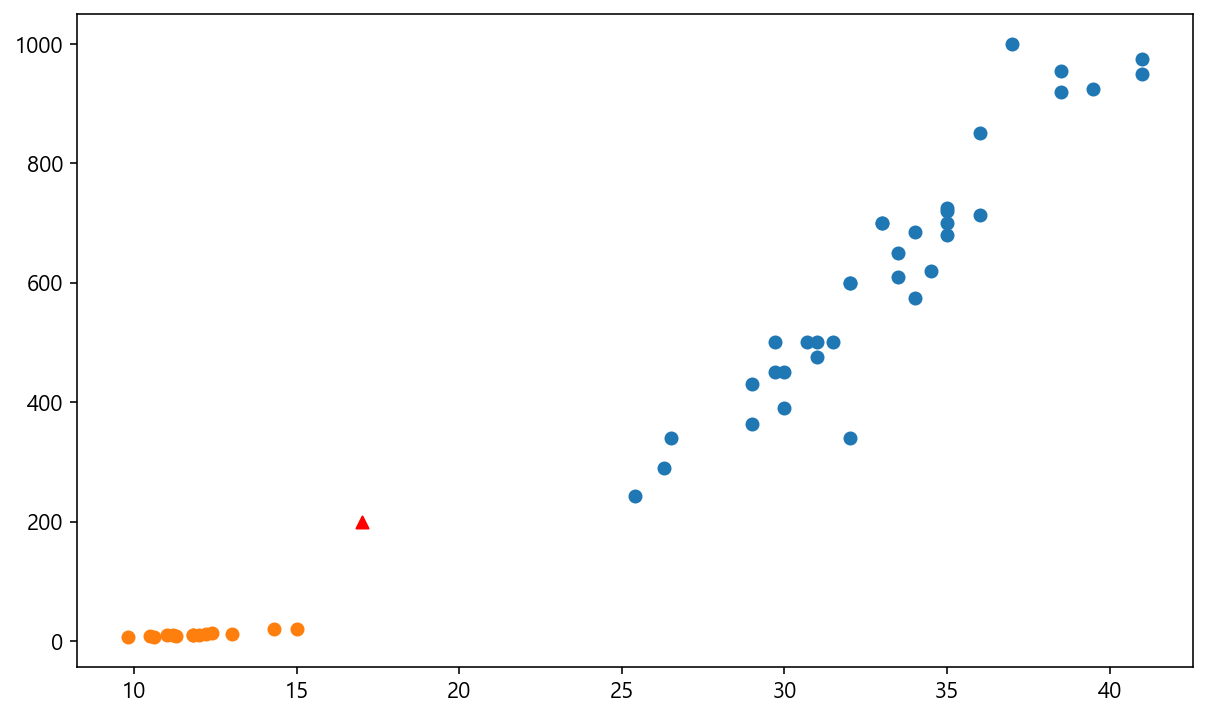

In [ ]:
# 빙어와 도미를 산점도로 출력하기
# 길이와 몸무게를 x, y
# scatter() - 산점도 그리는 맷플롯립 함수

# 도미
plt.scatter(bream_length, bream_weight) 
# 빙어
plt.scatter(smelt_length, smelt_weight);

# 미지의 새로운 데이타 
plt.scatter(17, 200, marker='^', color='red' );

-----------------------------------

#### ML_03_수업자료.html

↑ 지금까지는 두 가지 동일한 상황

# 훈련 세트와 테스트 세트


- 지도학습 Supervied learning : 입력과 타깃이 모두 있음
- 비지도학습 Unsupervied learning : 입력만 있음

- 훈련데이타 = 입력 + 타깃

 * 머신러닝 알고리즘의 평가를 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야한다.

 * 평가를 위한 또 다른 데이터를 준비하거나 이미 준비된 데이타중에서 일부를 떼어 내어 활용한다.


- 훈련 세트 = 학습용 : fit()
    - traing set : 훈련에 사용되는 데이터.
    

- 테스트 세트 = 검증용 : predict(), score()
    - test set : 평가에 사용하는 데이타.


- train_test_split() : 훈련세트와 테스트 세트를 지정된 비율에 의해 분리시키는 함수 

In [ ]:
# 훈련 세트와 테스트 세트 함수 임포트

from sklearn.model_selection import train_test_split

In [ ]:
train_test_split?

-----------------------------------

## 샘플링 편향(Sampling bias)

- 통계학상으로의 샘플링 편향이란 표본을 잘못 선택함으로써 통계 분석이 왜곡되는 것을 뜻한다.
```
예시)
야구장에서 1000명에게 가장 좋아하는 스포츠에 대해 설문조사를 했더니 
75%가 야구를 좋아한다고 했다.
따라서 한국사람들이 가장 좋아하는 스포츠는 야구가 틀림없다.
```


- 머신러닝에서의 샘플링 편향이란? 
```
훈련세트와 테스트 세트에 샘플이 골고루 섞여있지 않고 샘플링이 한쪽에 치워쳤다.
```

In [ ]:
# 1) 데이타 준비 

# 도미 데이타 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 데이타 
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 도미 + 빙어 길이 => 1차원 
length = bream_length + smelt_length

# 도미 + 빙어 무게  => 1차원 
weight = bream_weight + smelt_weight

X = [ [l, w] for l, w in zip(length, weight)]
y = [1]*len(bream_length) + [0]*len(smelt_length)

In [ ]:
# X, y

In [ ]:
len(bream_length), len(smelt_length)

(35, 14)

In [ ]:
# 학습용 데이터와 테스트 데이터 분리 

X_train = X[:35]
X_test = X[35:]
len(X_train), len(X_test)

(35, 14)

In [ ]:
# 데이터 분리 확인 

X_train[-1], X_test[0]

([41.0, 950.0], [9.8, 6.7])

In [ ]:
# 정답지 분리

y_train = y[:35]
y_test = y[35:]

In [ ]:
# 모델 생성하고 학습 시킴

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 테스트 입력 데이터 X_test 로 예측

model_knn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
model_knn.score(X_test, y_test)

0.0

-----------------------------------

## 랜덤하게 데이터 전체를 분리

In [ ]:
# X, y  # 섞이지 않은 상태

In [ ]:
# 학습 데이터와 테스트 데이터를 train_test_split() 로 분리


X_train, X_test, y_train, y_test = train_test_split( np.array(X), 
                                                    y,
                                                    random_state=1)

In [ ]:
# 제대로 섞였는지 확인

# y_train

In [ ]:
# 개수 확인 25% 정도인가?

len(y_test), len(y_train)

(13, 36)

In [ ]:
# 모델 생성하고 학습 시킴

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
model_knn.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
model_knn.score(X_test, y_test)

1.0